In [1]:
#Import modules
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import csv data into data frames
#This file contains information about all FIFA worlds cups e.g. year, location winner
dfCups = pd.read_csv('WorldCups.csv')


In [3]:
#Do a high-level review of the data
print(dfCups.shape)
print(dfCups.info())
print(dfCups.head(2))

(20, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
Year              20 non-null int64
Country           20 non-null object
Winner            20 non-null object
Runners-Up        20 non-null object
Third             20 non-null object
Fourth            20 non-null object
GoalsScored       20 non-null int64
QualifiedTeams    20 non-null int64
MatchesPlayed     20 non-null int64
Attendance        20 non-null object
dtypes: int64(4), object(6)
memory usage: 1.6+ KB
None
   Year  Country   Winner      Runners-Up    Third      Fourth  GoalsScored  \
0  1930  Uruguay  Uruguay       Argentina      USA  Yugoslavia           70   
1  1934    Italy    Italy  Czechoslovakia  Germany     Austria           70   

   QualifiedTeams  MatchesPlayed Attendance  
0              13             18    590.549  
1              16             17    363.000  


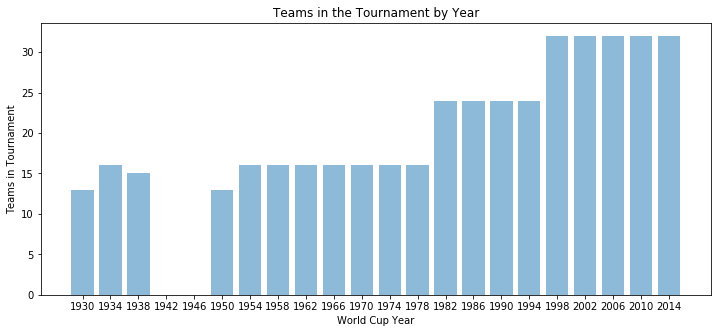

In [4]:
#Get a sense for how the tournament has evolved over the years as it relates to size of field

#We need to account for the years that WC was suspended during World War II
years = list(dfCups['Year'])
years.insert(3,1942)
years.insert(4,1946)

teams = list(dfCups['QualifiedTeams'])
teams.insert(3,0)
teams.insert(4,0)

y_pos = np.arange(len(years))

plt.figure(figsize=(12,5))
plt.bar(y_pos, teams, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('Teams in Tournament')
plt.xlabel('World Cup Year')
plt.title('Teams in the Tournament by Year')
plt.show()

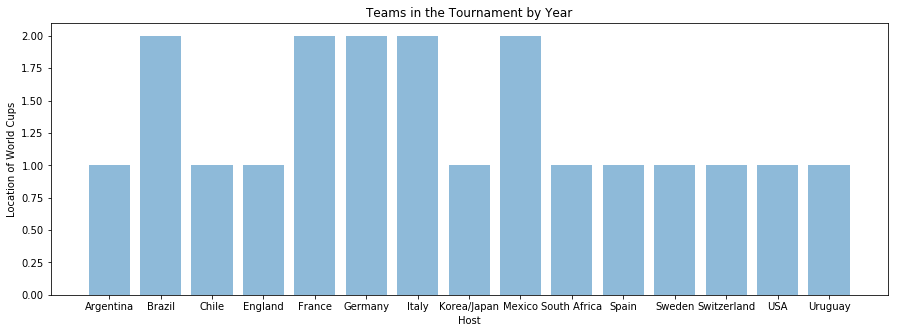

In [5]:
#Get a sense for where the tournament has been held
dfLocation=pd.DataFrame
dfLocation=dfCups.groupby('Country').count()

host = list(dfLocation.index)
host_instance = list(dfLocation['Year'])

y_pos = np.arange(len(host))

plt.figure(figsize=(15,5))
plt.bar(y_pos, host_instance, align='center', alpha=0.5)
plt.xticks(y_pos, host)
plt.ylabel('Location of World Cups')
plt.xlabel('Host')
plt.title('Teams in the Tournament by Year')
plt.show()







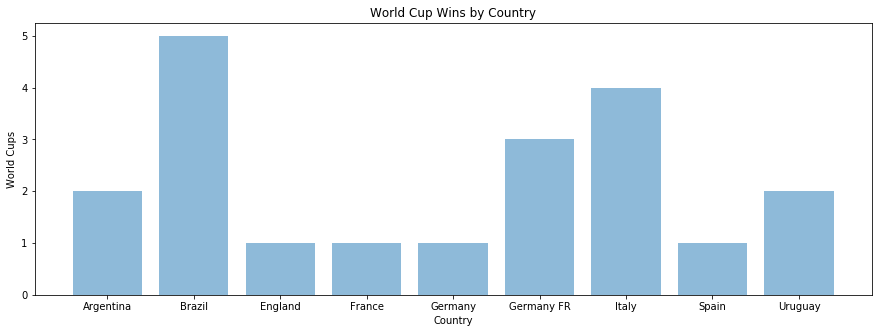

In [6]:
#Look at who has won the tournament
dfWinners=pd.DataFrame
dfWinners=dfCups.groupby('Winner').count()

winner = list(dfWinners.index)
winner_instance = list(dfWinners['Year'])

y_pos = np.arange(len(winner))

plt.figure(figsize=(15,5))
plt.bar(y_pos, winner_instance, align='center', alpha=0.5)
plt.xticks(y_pos, winner)
plt.ylabel('World Cups')
plt.xlabel('Country')
plt.title('World Cup Wins by Country')
plt.show()

In [7]:
#This file contains individual match information across all FIFA World Cup tournaments
dfMatches = pd.read_csv('WorldCupMatches.csv')



In [8]:
#Get a high-level sense of the imported data
print(dfMatches.shape)
print(dfMatches.info())
print(dfMatches.head(2))

(4572, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 10 columns):
Year           852 non-null float64
DateTime       852 non-null object
Round          852 non-null object
Stadium        852 non-null object
City           852 non-null object
HomeTeam       847 non-null object
HomeGoals      852 non-null float64
AwayGoals      852 non-null float64
AwayTeam       844 non-null object
Observation    852 non-null object
dtypes: float64(3), object(7)
memory usage: 357.3+ KB
None
     Year              DateTime    Round         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    

  HomeTeam  HomeGoals  AwayGoals AwayTeam Observation  
0   France        4.0        1.0   Mexico              
1      USA        3.0        0.0  Belgium              


In [9]:
#There are records where all fields are NaN, I want to drop those from the dfMatches
dfMatches=dfMatches.dropna(how='all')

In [10]:
#Check data again after transformation
print(dfMatches.shape)
print(dfMatches.info())
print(dfMatches.tail(2))

(852, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 852 entries, 0 to 851
Data columns (total 10 columns):
Year           852 non-null float64
DateTime       852 non-null object
Round          852 non-null object
Stadium        852 non-null object
City           852 non-null object
HomeTeam       847 non-null object
HomeGoals      852 non-null float64
AwayGoals      852 non-null float64
AwayTeam       844 non-null object
Observation    852 non-null object
dtypes: float64(3), object(7)
memory usage: 73.2+ KB
None
       Year              DateTime                     Round  \
850  2014.0  12 Jul 2014 - 17:00   Play-off for third place   
851  2014.0  13 Jul 2014 - 16:00                      Final   

                 Stadium             City HomeTeam  HomeGoals  AwayGoals  \
850     Estadio Nacional        Brasilia    Brazil        0.0        3.0   
851  Estadio do Maracana  Rio De Janeiro   Germany        1.0        0.0   

        AwayTeam                    Observation  
850  

In [11]:
#Review records where there are Nulls, small number so moving forward
dfMatches[dfMatches['HomeTeam'].isnull()]


,Year,DateTime,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation
108,1958.0,08 Jun 1958 - 19:00,Group 1,Orjans Vall,Halmstad,NaN,1.0,0.0,Czechoslovakia,
126,1958.0,17 Jun 1958 - 19:00,Group 1,Malmo Stadion,Malm�,NaN,2.0,1.0,Czechoslovakia,Northern Ireland win after extra time
343,1982.0,25 Jun 1982 - 21:00,Group 5,Luis Casanova,Valencia,NaN,1.0,0.0,Spain,
378,1986.0,07 Jun 1986 - 12:00,Group D,Tres de Marzo,Guadalajara,NaN,1.0,2.0,Spain,
392,1986.0,12 Jun 1986 - 12:00,Group D,Jalisco,Guadalajara,NaN,0.0,3.0,Brazil,


In [12]:
dfMatches[dfMatches['AwayTeam'].isnull()]

,Year,DateTime,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation
115,1958.0,11 Jun 1958 - 19:00,Group 1,Orjans Vall,Halmstad,Argentina,3.0,1.0,NaN,
119,1958.0,15 Jun 1958 - 19:00,Group 1,Malmo Stadion,Malm�,Germany FR,2.0,2.0,NaN,
131,1958.0,19 Jun 1958 - 19:00,Quarter-finals,Idrottsparken,Norrk�Ping,France,4.0,0.0,NaN,
319,1982.0,17 Jun 1982 - 21:00,Group 5,La Romareda,Zaragoza,Yugoslavia,0.0,0.0,NaN,
331,1982.0,21 Jun 1982 - 21:00,Group 5,La Romareda,Zaragoza,Honduras,1.0,1.0,NaN,
348,1982.0,01 Jul 1982 - 17:15,Group 4,Vicente Calderon,Madrid,Austria,2.0,2.0,NaN,
352,1982.0,04 Jul 1982 - 17:15,Group 4,Vicente Calderon,Madrid,France,4.0,1.0,NaN,
366,1986.0,03 Jun 1986 - 12:00,Group D,Tres de Marzo,Guadalajara,Algeria,1.0,1.0,NaN,


In [13]:
#Need to create a field to capture who won the game as well as goal differential

goal_diff=[]
winner=[]


for index, row in dfMatches.iterrows():
    goal_diff.append(abs(row['HomeGoals']-row['AwayGoals']))
    if row['HomeGoals'] > row['AwayGoals']:
        winner.append(row['HomeTeam'])
    elif row['HomeGoals'] < row['AwayGoals']:
        winner.append(row['AwayTeam'])
    else:
        winner.append('Tie')        


dfMatches['GoalDiff'] = goal_diff
dfMatches['Winner'] = winner



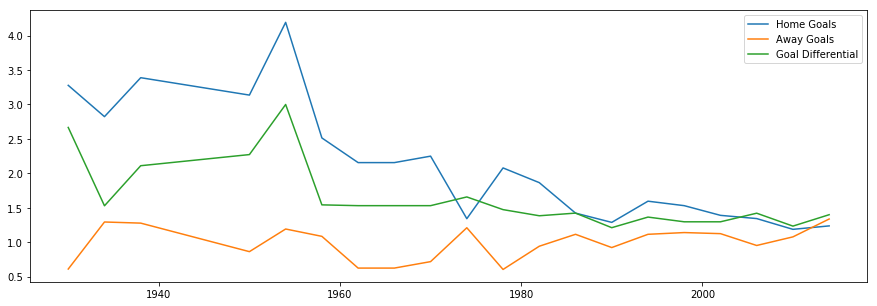

In [14]:
#Have matches been getting more competitive by looking at average goals by home and away teams as well as goal diff

plt.figure(figsize=(15,5))
plt.plot(dfMatches.groupby('Year').aggregate(np.mean))
plt.legend(['Home Goals','Away Goals','Goal Differential'])

plt.show()

In [15]:
#Is there an advantage to being the home-team

HomeOrAway=[]

for index, row in dfMatches.iterrows():
    if row['Winner'] == row['HomeTeam']:
        HomeOrAway.append('Home')
    elif row['Winner'] == row['AwayTeam']:
        HomeOrAway.append('Away')
    else:
        HomeOrAway.append('Tie')
        
dfMatches['HomeOrAway'] = HomeOrAway

In [16]:
dfHomeAway = pd.DataFrame
dfHomeAway = dfMatches['HomeOrAway'].value_counts()
dfHomeAway



Home    485
Tie     193
Away    174
Name: HomeOrAway, dtype: int64

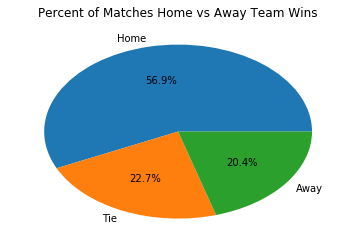

In [17]:
label = []
for item in (dfHomeAway.index):
    label.append(item)
    
plt.pie(dfHomeAway, labels=label, autopct='%1.1f%%')
plt.title('Percent of Matches Home vs Away Team Wins')
plt.show()



In [18]:
#games in elimination rounds that end in ties, vs, ties in non elimination rounds

#Preliminary Rounds
searchfor = ['Group', 'round']
dfGroupStageTies = pd.DataFrame


dfGroupStageTies = dfMatches.loc[lambda dfMatches: dfMatches['Round'].str.contains('|'.join(searchfor)), :]['HomeOrAway'].value_counts()

GroupStagePercentTies = dfGroupStageTies.loc['Tie']/(dfGroupStageTies.loc['Home']+dfGroupStageTies.loc['Away']+dfGroupStageTies.loc['Tie'])

print(GroupStagePercentTies)


0.2519561815336463


In [19]:
#Elimination Rounds
dfEliminationStageTies = pd.DataFrame
dfEliminationStageTies = dfMatches.loc[lambda dfMatches: ~dfMatches['Round'].str.contains('|'.join(searchfor)), :]['HomeOrAway'].value_counts()

EliminationStagePercentTies = dfEliminationStageTies.loc['Tie']/(dfEliminationStageTies.loc['Home']+dfEliminationStageTies.loc['Away']+dfEliminationStageTies.loc['Tie'])

print(EliminationStagePercentTies)



0.15023474178403756
